This function will define every finger movement as a block of time that is 200 ms before the starting point of the movement, 1 ms of the starting point, and 1000 ms after the starting point of the movement. 

Such that each finger movement will extract 1201 indices of brain data that relate to the movement of that finger
Gather all the signals for each event and average across them such that there is a list of averaged brain signals of length 1201 for each unique finger movement. 

For example – let’s say the patient was asked to move finger 1 one hundred times (100 trials), there are now 100 samples of a block of time in brain data of length 1201. Average across the 100 trials such that we only end up with 1 list of length 1201 for that finger.

This function will plot the averaged brain response for each finger

This function will return a matrix with the averaged brain response list for each finger – matrix size will be 5x1201 – five finger events, and the length of brain data for each event – 1201 – order by finger – finger 1 should be the first row.

In [161]:
import pandas as pd
from collections import defaultdict
import statistics
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt

In [162]:
brainFile = 'mini_project_2_data/brain_data_channel_one.csv'
eventsFile = 'mini_project_2_data/events_file_ordered.csv'

brainData = pd.read_csv(brainFile, header=None, names=['signal'])
eventsData = pd.read_csv(eventsFile, header=None, names=['startTime', 'peakTime', 'finger'], dtype=int)

In [163]:
'''
input:
    trial_points – a CSV file with three columns with the starting point of every movement, 
    the peak of every movement and the number finger (we worked on this together in the review session.) 
    Your function needs to make sure the data imported is of type “int” for ONLY this csv file.
    ------
    ecog_data – A CSV file of one column with the time series of the signal recorded using an ECOG electrode. 
    The indices in this file (number of rows) match up to the indices that appear in 
    the starting points and peak points in the trial_points data.
output:
    Your function will output a matrix with five rows and 1201 columns – 
    5x1201 into a variable named “fingers_erp_mean” in the order of fingers – 1, 2, 3, 4, 5.

'''
def calc_mean_erp(trial_points, ecog_data):
    # Apply Gaussian smoothing to the ecog data
    ecog_data['signal'] = gaussian_filter1d(ecog_data['signal'], sigma=10)

    fingerDict = {
            1:defaultdict(list),
            2:defaultdict(list),
            3:defaultdict(list),
            4:defaultdict(list),
            5:defaultdict(list)
        }

    for index, row in eventsData.iterrows():
        finger = row['finger']
        start = row['startTime'] - 200
        end = row['startTime'] + 1000
        eventSample = list(brainData.loc[start:end, 'signal'])
        for i, signal in enumerate(eventSample):
            fingerDict[finger][i].append(signal)

    fingerDictAverage = {
            1:defaultdict(int),
            2:defaultdict(int),
            3:defaultdict(int),
            4:defaultdict(int),
            5:defaultdict(int)
        }

    for finger in fingerDict:
        for sample in fingerDict[finger]:
            fingerDictAverage[finger][sample] = statistics.mean(fingerDict[finger][sample])

    return pd.DataFrame(fingerDictAverage).T

In [164]:
result = calc_mean_erp(eventsData, brainData)
result

,0,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200
1,123.582399,127.393554,131.270672,135.192208,139.133263,143.066328,146.962254,150.791352,154.524767,158.135281,...,55.010070,58.079292,60.933412,63.579664,66.019432,68.248088,70.255120,72.024726,73.536698,74.767487
2,-301.722319,-303.625094,-305.460081,-307.217037,-308.887218,-310.462938,-311.937612,-313.305460,-314.561025,-315.699259,...,-178.071926,-184.414458,-190.221871,-195.477512,-200.178963,-204.337699,-207.978998,-211.141246,-213.874651,-216.239925
3,-391.734981,-394.229310,-396.592489,-398.818775,-400.891485,-402.783753,-404.459277,-405.873712,-406.976926,-407.715602,...,318.288635,313.280374,307.911309,302.204000,296.183542,289.875944,283.306265,276.497131,269.467144,262.229394
4,-54.342354,-51.001700,-46.763724,-41.635446,-35.634779,-28.789615,-21.136640,-12.720358,-3.592111,6.190989,...,100.748397,100.681758,100.607461,100.579918,100.651401,100.871839,101.288042,101.942999,102.875750,104.121332
5,-108.203316,-106.295828,-103.342078,-99.346624,-94.333431,-88.344383,-81.436915,-73.681544,-65.159513,-55.960266,...,-322.711798,-314.566715,-305.371894,-295.152932,-283.946922,-271.802136,-258.777294,-244.941047,-230.371345,-215.154339


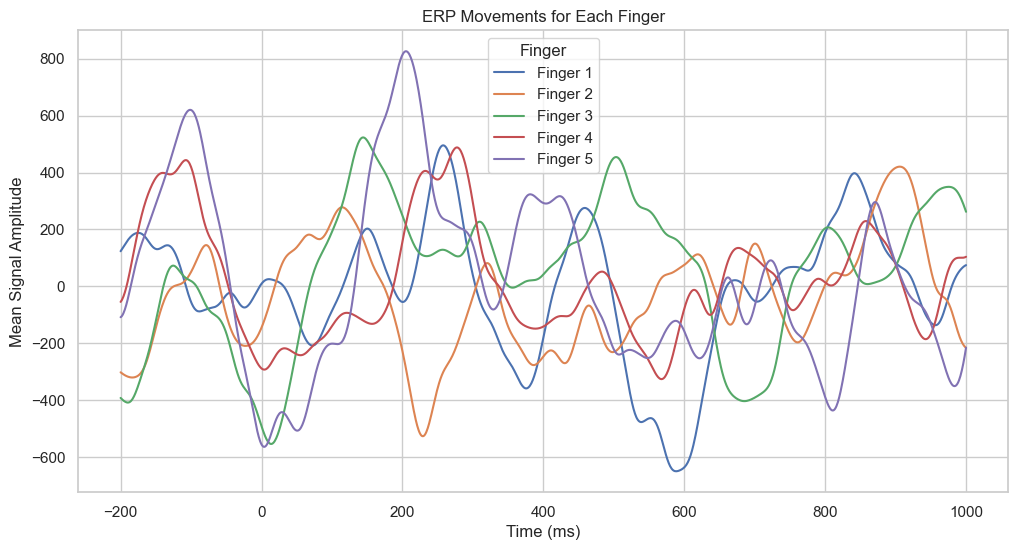

In [165]:
# Assuming 'result' is the DataFrame with 5 rows and 1201 columns (fingers_erp_mean)
def plot_finger_movements(fingers_erp_mean):
    time_points = range(-200, 1001)  # Time points from -200 ms to +1000 ms
    plt.figure(figsize=(12, 6))
    
    # Plot each finger's ERP
    for finger in range(1, 6):
        plt.plot(time_points, fingers_erp_mean.loc[finger], label=f'Finger {finger}')
    
    # Add title, labels, and legend
    plt.title('ERP Movements for Each Finger')
    plt.xlabel('Time (ms)')
    plt.ylabel('Mean Signal Amplitude')
    plt.legend(title='Finger')
    plt.grid(True)
    
    # Display the plot
    plt.show()

# Call the function with the ERP data
plot_finger_movements(result)